In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import re
import joblib
import string


In [6]:
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
# adding a new column called "class" to each DataFrame
fake['class'] = 0
true['class'] = 1



In [9]:
# Combine both datasets
data = pd.concat([fake, true], axis=0)

In [10]:
data.sample(10)

,title,text,subject,date,class
18059,New U.S. helicopters mark major change for Afg...,"KANDAHAR, Afghanistan (Reuters) - Senior Afgha...",worldnews,"October 7, 2017",1
4478,Bill Maher’s #DebateNight Live Tweetstorm Was...,"It s no secret that Bill Maher, comedian extra...",News,"September 27, 2016",0
15093,"Katy Perry, Christina Aguilera, Kim and Kanye,...",There s so much diversity in the Democrat pres...,politics,"Oct 13, 2015",0
11783,WATCH CHUCK SCHUMER FAKE CRY Over Muslim Polic...,Chuck Schumer s crying over Muslim refugees.Af...,politics,"Jan 29, 2017",0
193,WATCH: John McCain Mocks President Bone Spurs...,"Sen. John McCain, whose status as a war hero D...",News,"October 23, 2017",0
16545,BOOM! Dodgers Baseball Radio Legend Drops A Mi...,This is totally out of left field! Vin Scully ...,Government News,"Jun 19, 2016",0
17486,BREAKING: FBI ARREST STOPS Horrific San Franci...,Truck attacks are becoming increasingly popula...,left-news,"Dec 23, 2017",0
22835,Tillerson to North Korea: ‘We Are Not Your Ene...,21st Century Wire says While everyone is busy ...,Middle-east,"August 2, 2017",0
5793,Afghanistan War Vet Humiliates Republican Opp...,Thinking before you speak is basically a requi...,News,"June 21, 2016",0
21014,THIRD DEGREE “BERN!” Why Denmark Is Telling Ma...,Lying? If Bernie can successfully convince ten...,left-news,"Feb 10, 2016",0


In [11]:
print(data.columns)  # See all available columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')


In [12]:
columns_to_drop = ["title", "subject", "date"]
existing_cols = [col for col in columns_to_drop if col in data.columns]
data = data.drop(existing_cols, axis=1)


In [13]:
print(data.columns)


Index(['text', 'class'], dtype='object')


In [14]:
data.sample(5)

,text,class
47,WASHINGTON (Reuters) - U.S. Interior Secretary...,1
13331,BUENOS AIRES (Reuters) - Forensic scientists h...,1
5961,"Donald Trump, the GOP candidate who has been c...",0
18741,ISTANBUL (Reuters) - Turkish prosecutors have ...,1
21199,Of course in their blind rage for the conserva...,0


In [15]:
data.reset_index(inplace=True)




In [16]:
data.drop(['index'], axis=1, inplace=True)



In [17]:
data.sample(5)

,text,class
36286,DUBAI (Reuters) - A Western-backed Saudi-led c...,1
12142,OSU will receive more than $212 million in fed...,0
38854,(Reuters) - Saudi Arabia s Crown Prince Mohamm...,1
25663,(Reuters) - The chief executives of Intel Corp...,1
12011,,0


In [18]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation/numbers
    text = text.lower()
    return text

In [19]:
data["text"] = data["text"].apply(clean_text)


In [20]:
print(data["text"].head())        # view cleaned text
print(data["text"].isnull().sum())  # check if any rows became null


0    donald trump just couldn t wish all americans ...
1    house intelligence committee chairman devin nu...
2    on friday it was revealed that former milwauke...
3    on christmas day donald trump announced that h...
4    pope francis used his annual christmas day mes...
Name: text, dtype: object
0


In [21]:
data.sample(5)

,text,class
42687,singapore reuters a singaporean bodybuilder h...,1
38881,moscow reuters the kremlin said on wednesday ...,1
37705,tokyo reuters a japanese man was killed in a ...,1
7209,republicans were handed a harsh reminder of ho...,0
21648,black lives matter but only when white cops ar...,0


In [17]:
x = data["text"]
y = data["class"]
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)


In [18]:
print(xtrain.head())     # Shows the first 5 training text samples
print(ytrain.head())     # Shows the corresponding labels (0 = fake, 1 = real)


34830    seoul reuters  south korea predicted on tuesda...
6018     beebe arkansas mayor mike robertson loves jesu...
42549    new york reuters  eighty percent of the power ...
8670     when the black lives matter movement started g...
27243    washington reuters  the trump administrations ...
Name: text, dtype: object
34830    1
6018     0
42549    1
8670     0
27243    1
Name: class, dtype: int64


In [19]:
# Cell 1: Vectorization using TF-IDF
vectorizer = TfidfVectorizer()
xv_train = vectorizer.fit_transform(xtrain)
xv_test = vectorizer.transform(xtest)


In [20]:
lr = LogisticRegression()
lr.fit(xv_train, ytrain)


LogisticRegression()

In [21]:
prediction = lr.predict(xv_test)
lr.score(xv_test, ytest)


0.9899331848552338

In [22]:
from sklearn.metrics import classification_report

print(classification_report(ytest, prediction))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5895
           1       0.99      0.99      0.99      5330

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [23]:
import joblib

joblib.dump(vectorizer, "vectorizer.joblib")
joblib.dump(lr, "lr_model.joblib")


['lr_model.joblib']

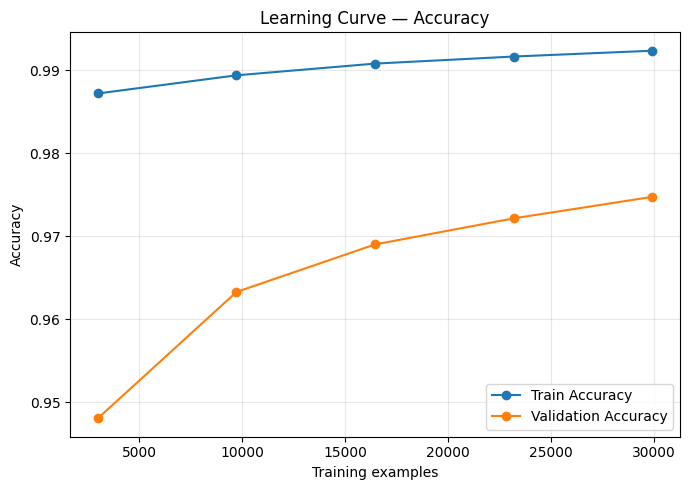

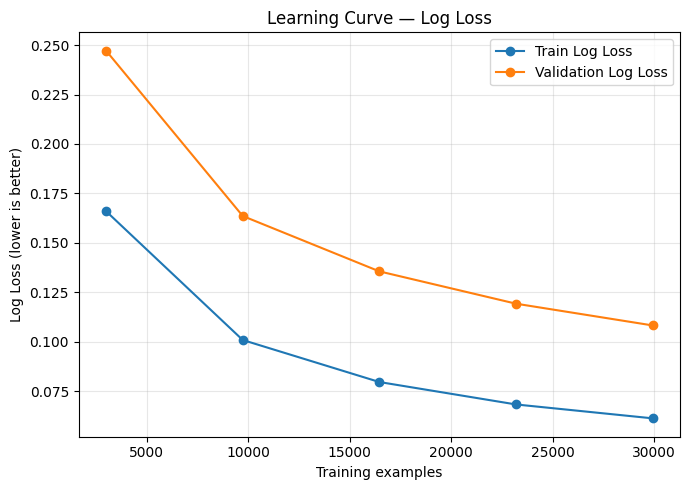

Done in 702.6s  |  CV=3, sizes=5, max_features=5000, n=44898


In [ ]:
# === Learning Curves: Training vs Validation (Accuracy + Log Loss) ===

import re, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

t0 = time.time()

# Use your cleaned dataset
texts  = data["text"].astype(str).values
labels = data["class"].astype(int).values

# ---- SPEED SETTINGS (tweak if needed) ----
CV_FOLDS = 3          # 3-fold CV (faster than 5)
N_SIZES  = 5          # number of training sizes (5 is enough for a nice curve)
MAX_FEAT = 5000       # cap TF-IDF vocab to speed up
# -----------------------------------------

pipe = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=MAX_FEAT)),
    ("lr", LogisticRegression(max_iter=200))
])

train_sizes = np.linspace(0.1, 1.0, N_SIZES)

# Accuracy curve
sizes_acc, train_acc, val_acc = learning_curve(
    estimator=pipe,
    X=texts, y=labels,
    train_sizes=train_sizes,
    cv=CV_FOLDS,
    scoring="accuracy",
    n_jobs=-1,
    shuffle=True,
    random_state=42
)

# Log-loss curve (negative scorer -> flip sign)
neg_ll = make_scorer(log_loss, needs_proba=True, greater_is_better=False)
sizes_ll, train_negll, val_negll = learning_curve(
    estimator=pipe,
    X=texts, y=labels,
    train_sizes=train_sizes,
    cv=CV_FOLDS,
    scoring=neg_ll,
    n_jobs=-1,
    shuffle=True,
    random_state=42
)
train_ll = -train_negll
val_ll   = -val_negll

# --- Plot: Accuracy ---
plt.figure(figsize=(7,5))
plt.plot(sizes_acc, train_acc.mean(axis=1), marker='o', label='Train Accuracy')
plt.plot(sizes_acc, val_acc.mean(axis=1), marker='o', label='Validation Accuracy')
plt.xlabel('Training examples'); plt.ylabel('Accuracy')
plt.title('Learning Curve — Accuracy')
plt.grid(alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

# --- Plot: Log Loss ---
plt.figure(figsize=(7,5))
plt.plot(sizes_ll, train_ll.mean(axis=1), marker='o', label='Train Log Loss')
plt.plot(sizes_ll, val_ll.mean(axis=1), marker='o', label='Validation Log Loss')
plt.xlabel('Training examples'); plt.ylabel('Log Loss (lower is better)')
plt.title('Learning Curve — Log Loss')
plt.grid(alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

print(f"Done in {time.time()-t0:.1f}s  |  CV={CV_FOLDS}, sizes={N_SIZES}, max_features={MAX_FEAT}, n={len(texts)}")
